In [ ]:
import numpy as np
import lmdb
import pickle

In [ ]:
env = lmdb.open('/home/jupyter/datasets/lsun-car/car/', readonly=True)
with env.begin() as txn:
    cursor = txn.cursor()
    count = 0
    for key, value in cursor:
        print(key)

        # Remember it's a CIFAR_Image object that is loaded
        cifar_image = pickle.loads(value)
        # Retrieve the relevant bits
        print(cifar_image)
        if count > 15:
            break
        count += 1

Viewing /home/jupyter/datasets/lsun-car/car/
Press ESC to exist or SPACE to advance.
Current key: b'0072d35b57c9e95755975f9eace1cb699124ebc4'


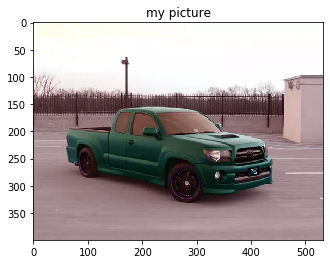

Current key: b'0072d4e40942f29d9501c1846f3072faf4a39bbb'


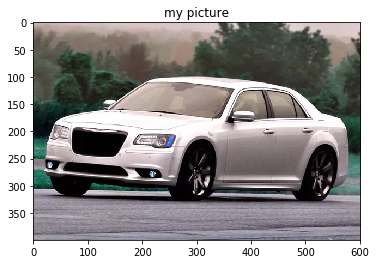

Current key: b'0072d5a177f05e40ddebf65741378edf380a70bb'


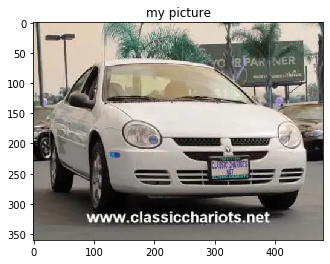

Exporting /home/jupyter/datasets/lsun-car/car/ to /home/jupyter/lsun_imgs/lsun_car
0072d3


TypeError: write() argument must be str, not bytes

In [5]:
from __future__ import print_function
import argparse
import cv2
import lmdb
import numpy
from matplotlib import pyplot as plt
import os
from os.path import exists, join

def view(db_path, limit):
    print('Viewing', db_path)
    print('Press ESC to exist or SPACE to advance.')
    window_name = 'LSUN'
    env = lmdb.open(db_path, map_size=1099511627776,
                    max_readers=100, readonly=True)
    with env.begin(write=False) as txn:
        cursor = txn.cursor()
        for i, (key, val) in enumerate(cursor):
            print('Current key:', key)
            img = cv2.imdecode(
                numpy.frombuffer(val, dtype=numpy.uint8), 1)
            plt.imshow(img)
            plt.title('my picture')
            plt.show()
            if i == limit: break


def export_images(db_path, out_dir, flat=False, limit=-1):
    print('Exporting', db_path, 'to', out_dir)
    env = lmdb.open(db_path, map_size=1099511627776,
                    max_readers=100, readonly=True)
    count = 0
    with env.begin(write=False) as txn:
        cursor = txn.cursor()
        for key, val in cursor:
            if not flat:
                print(key[:6].decode("ascii"))
                image_out_dir = join(out_dir, '/'.join(key[:6].decode("ascii")))
            else:
                image_out_dir = out_dir
            if not exists(image_out_dir):
                os.makedirs(image_out_dir)
            image_out_path = join(image_out_dir, key.decode("ascii") + '.webp')
            with open(image_out_path, 'w') as fp:
                fp.write(val)
            count += 1
            if count == limit:
                break
            if count % 1000 == 0:
                print('Finished', count, 'images')                
                

lmdb_path = '/home/jupyter/datasets/lsun-car/car/'
out_path  = '/home/jupyter/lsun_imgs/lsun_car'
view(lmdb_path, 2)
export_images(lmdb_path, out_path, limit=20)

In [3]:
join("fdsa", "fdja;l")

'fdsa/fdja;l'

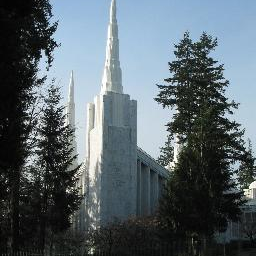

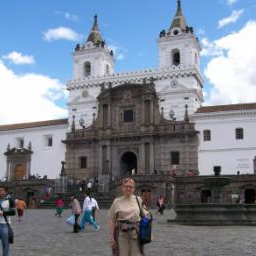

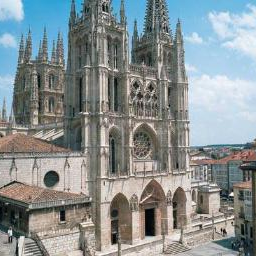

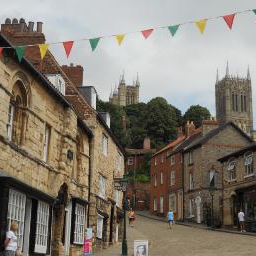

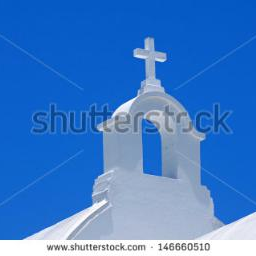

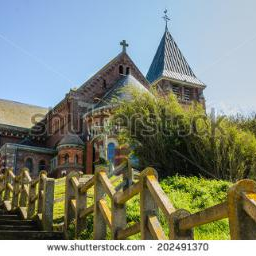

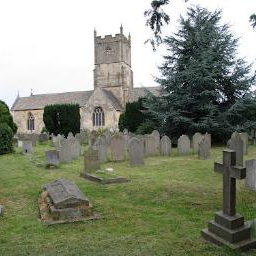

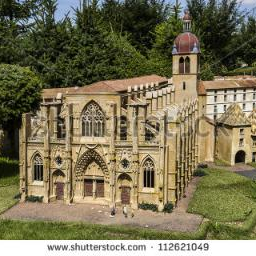

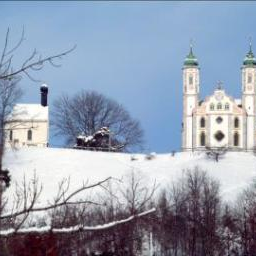

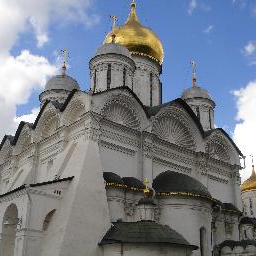

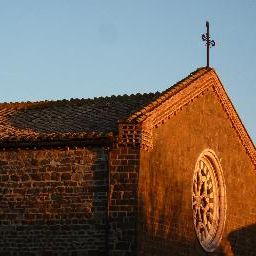

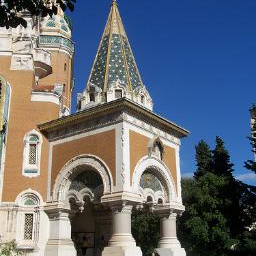

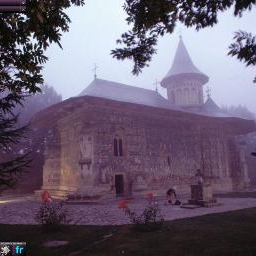

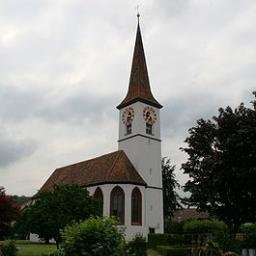

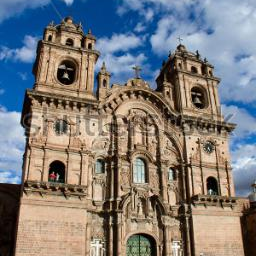

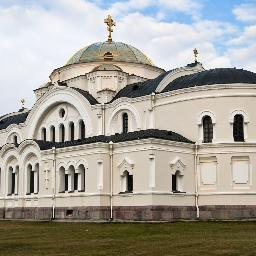

In [4]:
import os
from PIL import Image

path = '/home/jupyter/lsun_imgs/lsun_church/'
dirs = os.listdir(path)

# print(dirs)

for i, img_fn in enumerate(dirs):
  if i > 15:
    break
  im = Image.open(path + img_fn)
  display(im)

# path = '/content/results/stylegan2_cats/'
# dirs = os.listdir(path)

# print(dirs)

# for i, img_fn in enumerate(dirs):
#   if i > 15:
#     break
#   im = Image.open(path + img_fn)
#   display(im)

# path = '/content/results/stylegan2_church/'
# dirs = os.listdir(path)

# print(dirs)

# for i, img_fn in enumerate(dirs):
#   if i > 15:
#     break
#   im = Image.open(path + img_fn)
#   display(im)

In [1]:
import os
from PIL import Image

path = '/home/jupyter/image_folder/'
dirs = os.listdir(path)

print(dirs)

['stylegan2_cats', 'stylegan2_cars', 'lsun_cats', 'lsun_cars', 'lsun_churches', 'stylegan2_churches']


In [2]:
%run DeepFake_Dataloader.py
%run utils.py

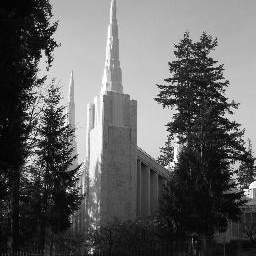

(256, 256)
(182,)


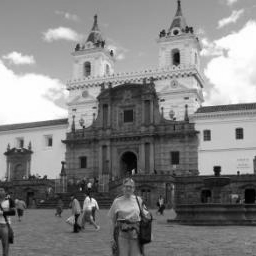

(256, 256)
(182,)


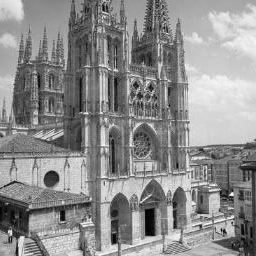

(256, 256)
(182,)


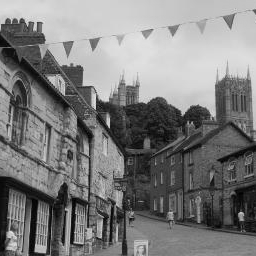

(256, 256)
(182,)


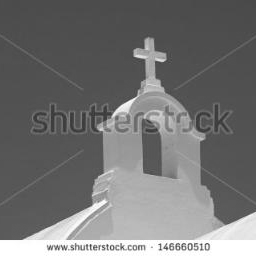

(256, 256)
(182,)


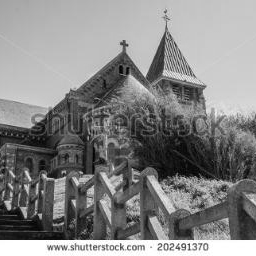

(256, 256)
(182,)


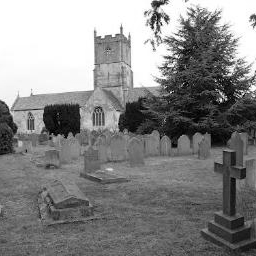

(256, 256)
(182,)


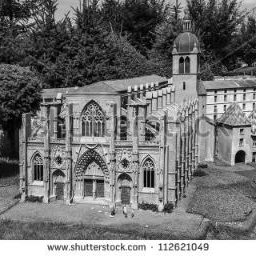

(256, 256)
(182,)


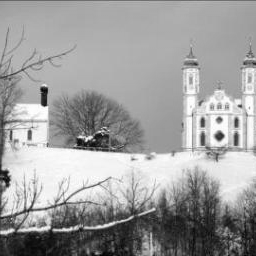

(256, 256)
(182,)


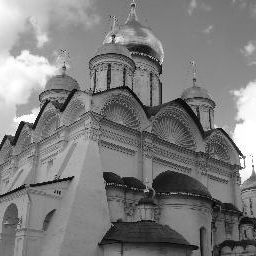

(256, 256)
(182,)


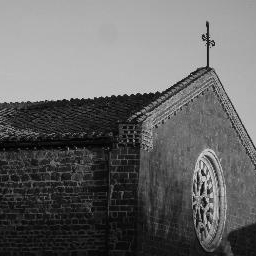

(256, 256)
(182,)


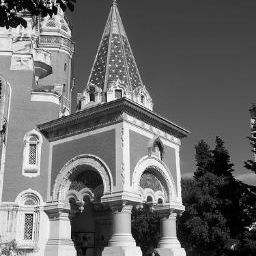

(256, 256)
(182,)


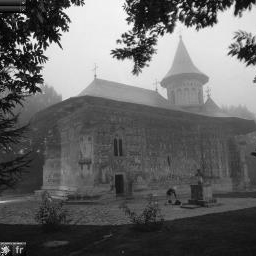

(256, 256)
(182,)


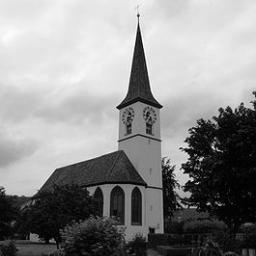

(256, 256)
(182,)


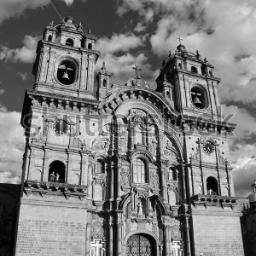

(256, 256)
(182,)


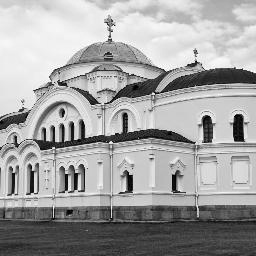

(256, 256)
(182,)


In [4]:
path = '/home/jupyter/lsun_imgs/lsun_church/'
dirs = os.listdir(path)

# print(dirs)

for i, img_fn in enumerate(dirs):
    if i > 15:
        break
    img = pil_grey_loader(path + img_fn)
    display(img)
    ms_img = np_magnitude_spectrum(img)
    rad_p = np_radial_profile(ms_img, center=(ms_img.shape[0]/2, ms_img.shape[1]/2))
    print(ms_img.shape)
    print(rad_p.shape)


